## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [244]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [245]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

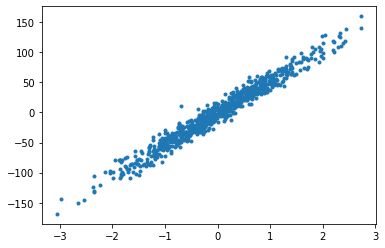

In [246]:
plt.plot(x_train, y_train, '.')
x_train = np.reshape(x_train, x_train.size)
# print(x_train)
# print(y_train)

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

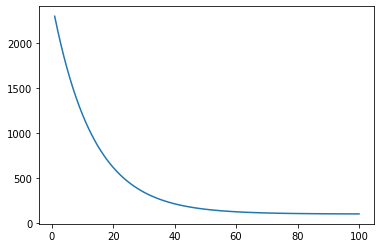

In [247]:
def Mean_square_error(y_test, y_pred):
  n = len(y_test)
  error_sum = 0
  for i in range(n):
    error_sum += (y_test[i] - y_pred[i]) ** 2
  # print(error_sum/n)
  return error_sum / n

learning_rate = 0.02

class linear_regression_model:
  def __init__(self):
    self.weight = np.random.randn()
    # print(self.weight)
    self.intercept = np.random.randn()
    # print(self.intercept)
  def fit(self, x_train, y_train):
    learning_curve = []
    iter = []
    n = len(x_train)
    
    for i in range(100):
      
      PDweight = -2 * np.sum(np.multiply(x_train, y_train - np.multiply(x_train, self.weight) - self.intercept)) / n

      PDintercept = -2 * np.sum(y_train - np.multiply(x_train, self.weight) - self.intercept) / n

      self.weight = self.weight - learning_rate * PDweight
      self.intercept = self.intercept - learning_rate * PDintercept
      # print(self.weight)
      current_model = model(self.weight, self.intercept)
      learning_curve.append(Mean_square_error(y_train, current_model.predict(x_train)))
      # print(self.weight, self.intercept, Mean_square_error(y_train, current_model.predict(x_train)))
      iter.append(i + 1)
    plt.plot(iter, learning_curve)
    # print(self.weight, self.intercept)
    return self.weight, self.intercept
class model:
  def __init__(self, weight, intercept):
    self.weight = weight
    self.intercept = intercept
  def predict(self, X):
    X = np.reshape(X, X.size)
    prediction = []
    for x in X:
      prediction.append(x * self.weight + self.intercept)
    return prediction
reg = linear_regression_model()
weight, intercept = reg.fit(x_train, y_train)
final = model(weight, intercept)

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

Mean Square Error: 108.30932957933352 


Weights: 51.607596394461865
intercepts: -0.40763934758487497 




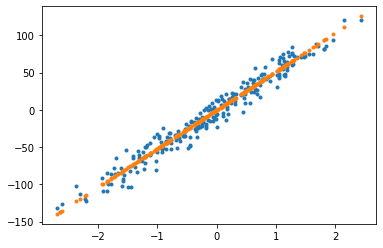

In [248]:
y_pred = final.predict(x_test)
print("Mean Square Error:", Mean_square_error(y_test, y_pred), "\n\n")
print("Weights:", weight)
print("intercepts:", intercept, "\n\n")
plt.plot(x_test, y_test, ".")
plt.plot(x_test, y_pred, ".")

# Part 2. Logistic regreesion model

## Load classification data

In [249]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

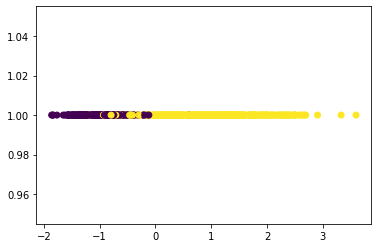

In [250]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)
x_train = np.reshape(x_train, x_train.size)
x_test = np.reshape(x_test, x_test.size)
# print(x_train)
# print(y_train)

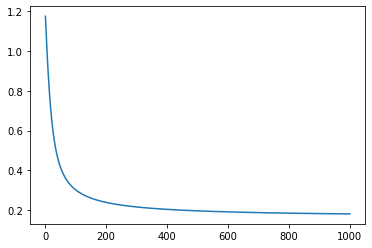

In [251]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def cross_entropy(y_test, y_pred):
  n = len(y_test)
  total = np.sum(y_test * np.log(y_pred + 1e-100) + (1- y_test) * np.log(1 - y_pred + 1e-100))
  return - total / n

learning_rate = 0.0001


class logistic_regression_model:
  def __init__(self):
    self.weight = np.random.randn()
    # print(self.weight)
    self.intercept = np.random.randn()
    # print(self.intercept)
  def fit(self, x_train, y_train):
    learning_curve = []
    iter = []
    n = len(x_train)
    for i in range(1000):
      predict_value = sigmoid(self.weight * x_train + self.intercept)
      actual_value = y_train

      PDweight = - np.sum((actual_value - predict_value) / (predict_value * (1 - predict_value)) * predict_value * (1 - predict_value) * x_train)
      PDintercept = - np.sum((actual_value - predict_value) / (predict_value * (1 - predict_value)) * predict_value * (1 - predict_value))
      
      self.weight = self.weight - learning_rate * PDweight
      self.intercept = self.intercept - learning_rate * PDintercept
      # print(PDweight, self.weight)
      current_predict = sigmoid(self.weight * x_train + self.intercept)

      learning_curve.append(cross_entropy(actual_value, current_predict))

      iter.append(i + 1)
    # print(learning_curve)
    plt.plot(iter, learning_curve)
    plt.show
    # print(self.weight, self.intercept)

    return self.weight, self.intercept

reg = logistic_regression_model()
weight, intercept = reg.fit(x_train, y_train)
# weight, intercept = 3.23, 0.73
y_pred = sigmoid(weight * x_test + intercept)



Cross entropy 0.17926808232259622 


Weights: 3.581230053549105
intercepts: 0.933454384753555 




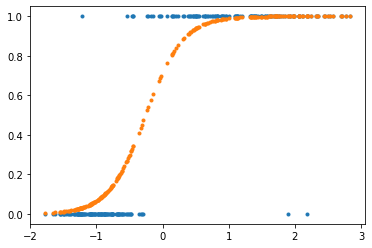

In [252]:
print("Cross entropy", cross_entropy(y_test, y_pred), "\n\n")
print("Weights:", weight)
print("intercepts:", intercept, "\n\n")
plt.plot(x_test, y_test, ".")
plt.plot(x_test, y_pred, ".")